In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\online_shoppers_intention.csv")
original_df=pd.read_csv(r"C:\Users\DELL\Downloads\online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


## Data Preprocessing

### Label encoding

In [7]:
df.replace(['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False


In [8]:
le = LabelEncoder()
vistype=LabelEncoder()

In [9]:
df['Revenue'] = le.fit_transform(df['Revenue'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['VisitorType'] = vistype.fit_transform(df['VisitorType'])
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,2,0,0


### Normalization

In [10]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

In [11]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [12]:
def Normalize(colName):
    Norm = (df[colName] - df[colName].min()) / (df[colName].max() - df[colName].min())
    return Norm

In [13]:
df['Month']=Normalize('Month')
df['TrafficType']=Normalize('TrafficType')
df['Browser']=Normalize('Browser')
df['OperatingSystems']=Normalize('OperatingSystems')
df['Administrative_Duration']=Normalize('Administrative_Duration')
df['ProductRelated']=Normalize('ProductRelated')
df['ProductRelated_Duration']=Normalize('ProductRelated_Duration')
df['PageValues']=Normalize('PageValues')
df['ExitRates']=Normalize('ExitRates')
df['VisitorType']=Normalize('VisitorType')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,0.001418,0.000000,0.200000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1,0.000000,1.0,0,0
1,0,0.000000,0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.0,0.142857,0.083333,1,0.052632,1.0,0,0
2,0,0.000000,0,0.0,0.001418,0.000000,0.200000,1.000000,0.000000,0.0,0.0,0.428571,0.000000,9,0.105263,1.0,0,0
3,0,0.000000,0,0.0,0.002837,0.000042,0.050000,0.700000,0.000000,0.0,0.0,0.285714,0.083333,2,0.157895,1.0,0,0
4,0,0.000000,0,0.0,0.014184,0.009809,0.020000,0.250000,0.000000,0.0,0.0,0.285714,0.166667,1,0.157895,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.042663,0,0.0,0.075177,0.027883,0.007143,0.145153,0.033839,0.0,1.0,0.428571,0.416667,1,0.000000,1.0,1,0
12326,0,0.000000,0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.9,0.285714,0.083333,1,0.368421,1.0,1,0
12327,0,0.000000,0,0.0,0.008511,0.002880,0.083333,0.433333,0.000000,0.0,0.9,0.285714,0.083333,1,0.631579,1.0,1,0
12328,4,0.022067,0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.9,0.142857,0.083333,3,0.526316,1.0,0,0


### One hot label encoding

In [14]:
d=pd.read_csv(r"C:\Users\DELL\Downloads\online_shoppers_intention.csv")

In [15]:
shopping_df= pd.get_dummies(d,drop_first=False)
shopping_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,1


In [16]:
shopping_df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

## <font color = 'blue' > In df dataframe I used label encoding then normalization while in shopping_df dataframe I used one hot label encoding</font>

# Data Visualization

<AxesSubplot:>

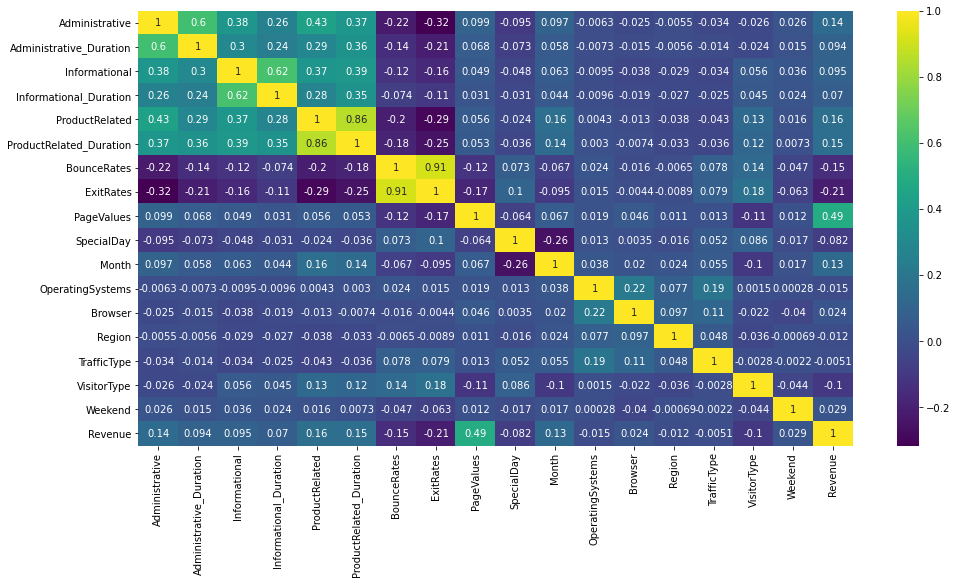

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:>

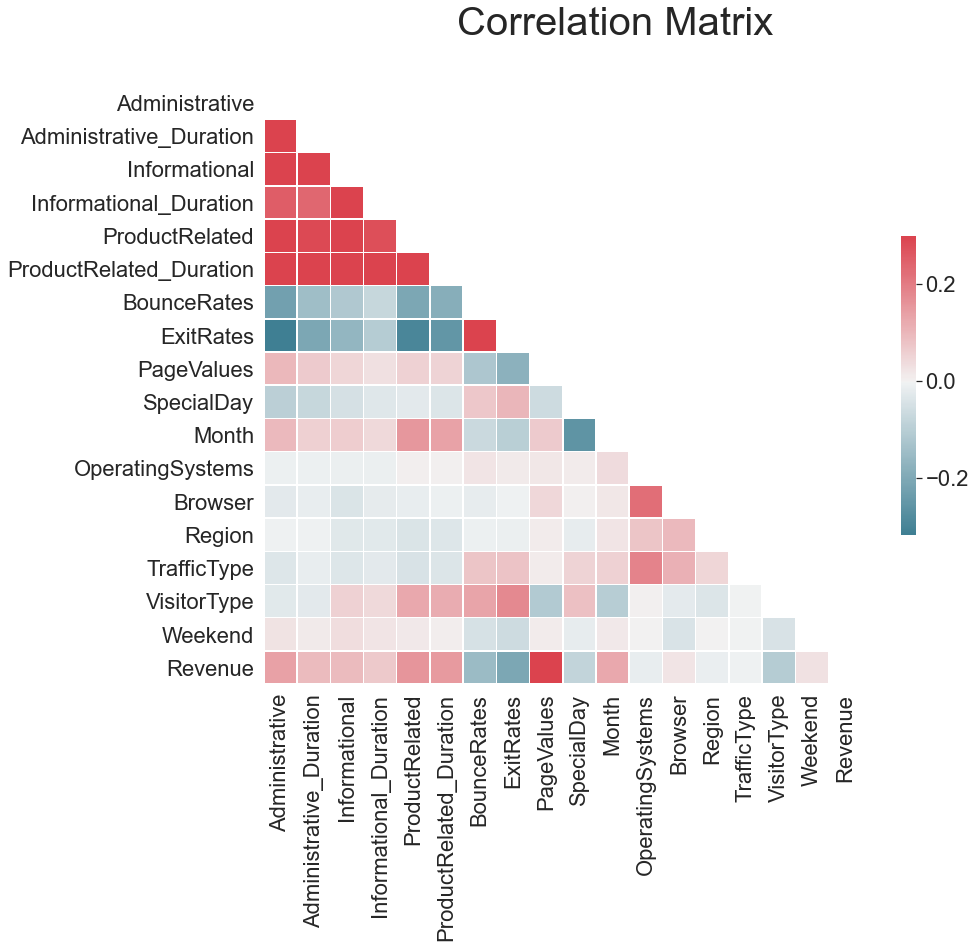

In [18]:
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 11))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


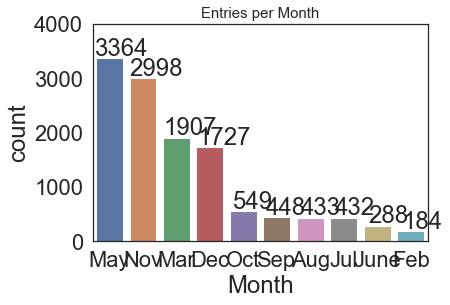

In [19]:
monthly = original_df['Month'].value_counts()

sns.countplot(original_df['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

<AxesSubplot:xlabel='Month', ylabel='count'>

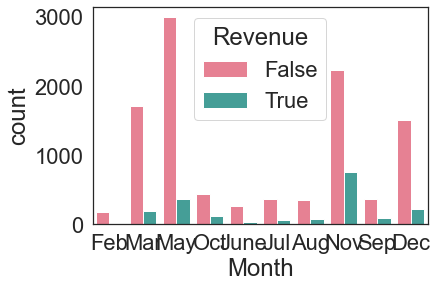

In [20]:
sns.countplot(data=original_df,x='Month',hue='Revenue',palette="husl")

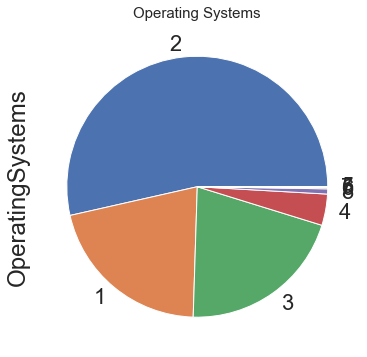

In [21]:
os_plot = original_df['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Sales ratio per Operating System')

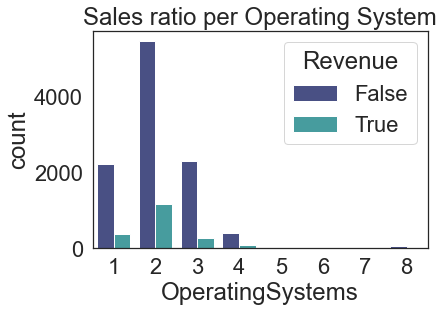

In [22]:
sns.countplot(data = original_df, x ='OperatingSystems',hue = 'Revenue',
             palette = "mako").set_title('Sales ratio per Operating System')

<AxesSubplot:xlabel='ExitRates', ylabel='BounceRates'>

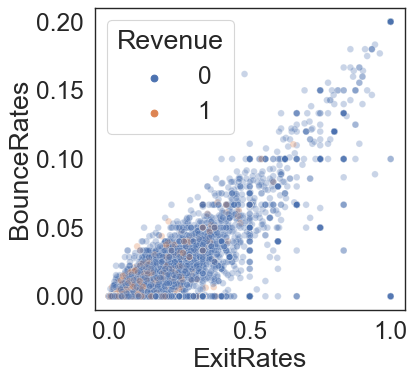

In [23]:
plt.figure(figsize=(5,5),dpi=80)
sns.scatterplot(data=df,x='ExitRates',y='BounceRates',hue='Revenue',alpha=0.3)

<AxesSubplot:>

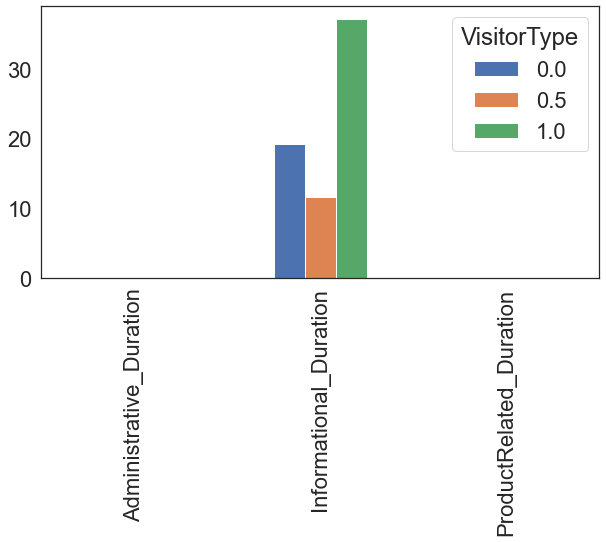

In [24]:
df_pvt=df[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','VisitorType']]
pd.pivot_table(df_pvt, values=['Administrative_Duration','Informational_Duration','ProductRelated_Duration'],columns=['VisitorType'], aggfunc='mean').plot(kind='bar', figsize=(10, 5))

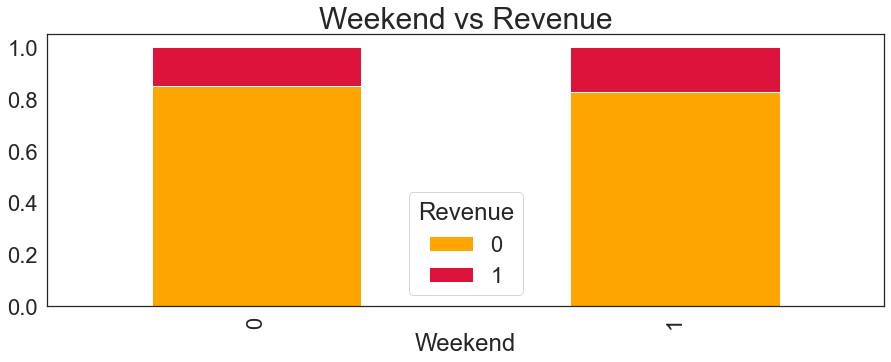

In [25]:
dff = pd.crosstab(df['Weekend'], df['Revenue'])
dff.div(dff.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

Text(0.5, 1.0, 'Sales ratio around Special Days')

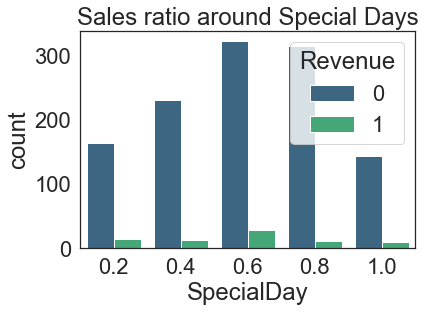

In [26]:
df2 = df[df['SpecialDay']!=0]
sns.countplot(data = df2, x ='SpecialDay',hue = 'Revenue',
             palette = "viridis").set_title('Sales ratio around Special Days')

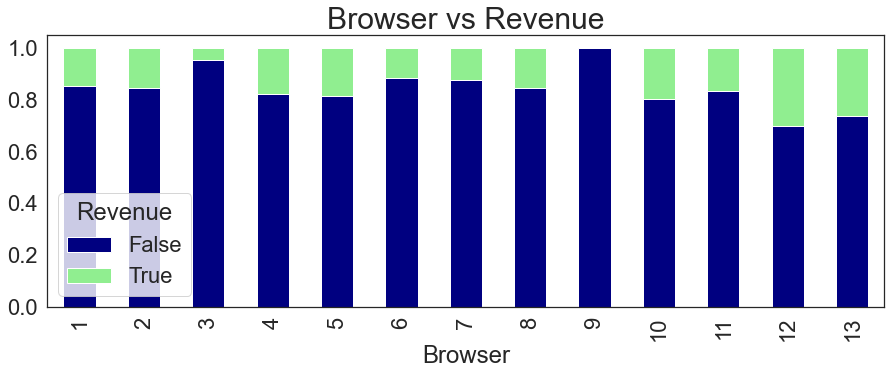

In [27]:
bb = pd.crosstab(original_df['Browser'], original_df['Revenue'])
bb.div(bb.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['navy', 'lightgreen'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


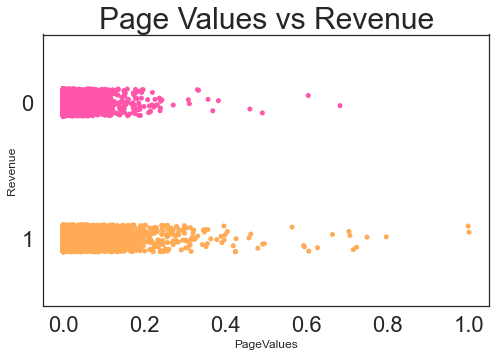

In [28]:
# strip plot for page values vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['PageValues'], df['Revenue'], palette = 'spring', orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)
plt.show()

 We see here PageValues is exponentially distributed for both purchased(True) or not puchased(False).
 
 We also see there are so many outliers in puchased(True) according to ExitRates.
 
 Most important things is here PageValues are highly influenced to purchased(True) a product.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


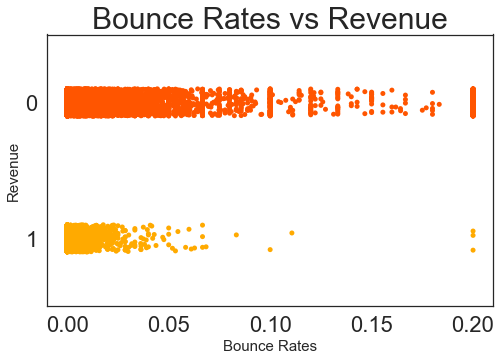

In [29]:
# strip plot for bounce rates vs revenue
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['BounceRates'], df['Revenue'], palette = 'autumn', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

-We see here BounceRates is exponentially distributed for both purchased(True) or not puchased(False).

-We also see there are so many outliers in not puchased(False) according to ExitRates.

-BounceRates is highly influenced to buy a product or not.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


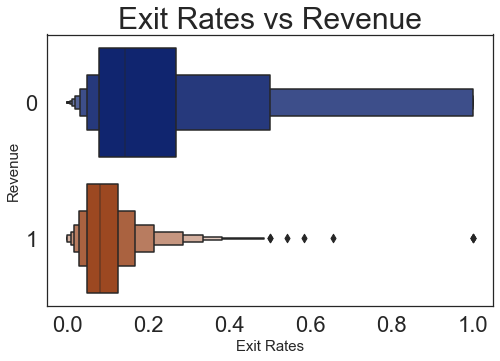

In [30]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['ExitRates'], df['Revenue'], palette = 'dark', orient = 'h')
plt.title('Exit Rates vs Revenue', fontsize = 30)
plt.xlabel('Exit Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

-We see here ExitRates is normally(gaussian) distributed for both purchased(True) or not puchased(False).

-We also see there are so many outliers in not puchased(False) according to ExitRates.

Text(0.5, 1.0, 'Sales ratio per Region')

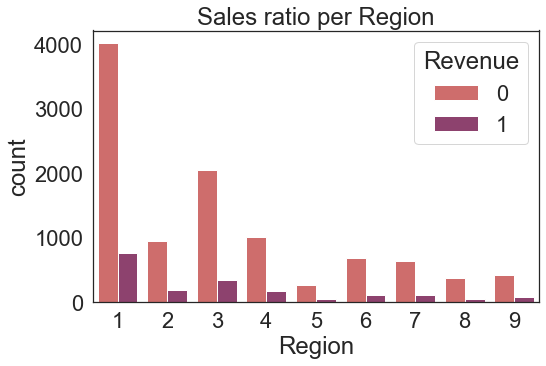

In [31]:
sns.countplot(data = df, x ='Region',hue = 'Revenue',
             palette = "flare").set_title('Sales ratio per Region')

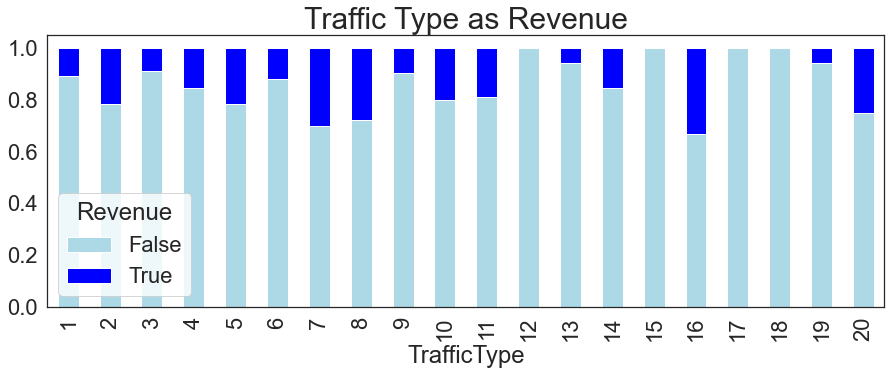

In [32]:
tt = pd.crosstab(shopping_df['TrafficType'], shopping_df['Revenue'])
tt.div(tt.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type as Revenue', fontsize = 30)
plt.show()

We see here Traffic Type is a categorical column.

In this visualization, every category is different than others. Some of them are highly influenced to buy a product such as (2, 7, 16, 20, etc).

In [33]:
original_df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

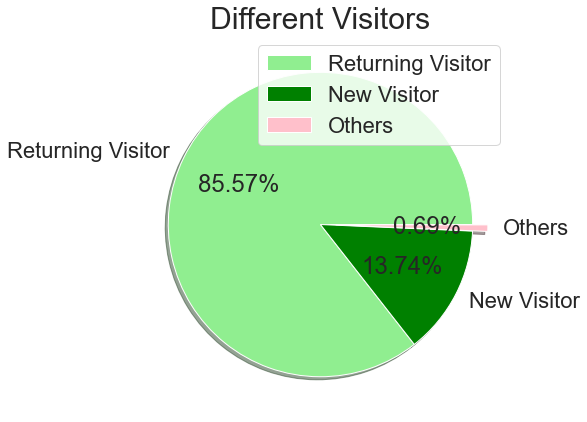

In [34]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Sales ratio per Visitor Type')

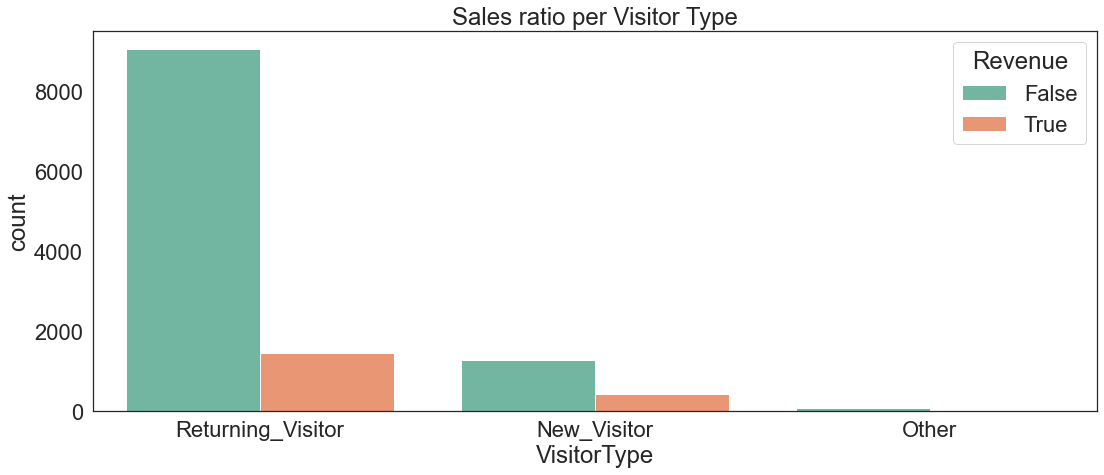

In [35]:
sns.countplot(data = original_df, x ='VisitorType',hue = 'Revenue',
             palette = "Set2").set_title('Sales ratio per Visitor Type')

# Modeling

## 1)Modeling shopping_df

In [36]:
X = shopping_df.drop('Revenue',axis=1)
y = shopping_df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1-Logistic Regression

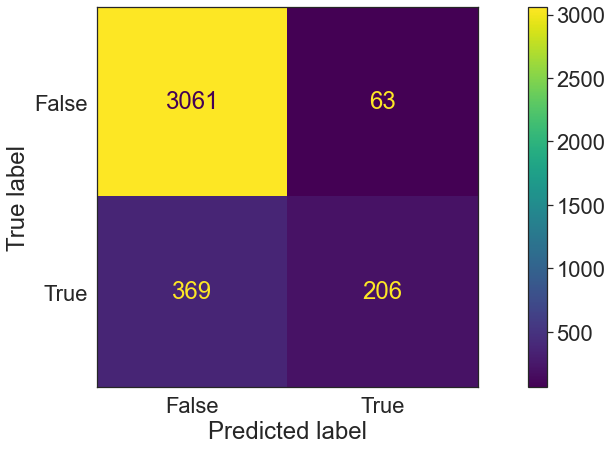

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

plot_confusion_matrix(lr,X_test,y_test)

In [39]:
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Testing Accuracy: ", lr.score(X_test, y_test))

Training Accuracy:  0.8857606302861777
Testing Accuracy:  0.8832116788321168


### 2-KNN

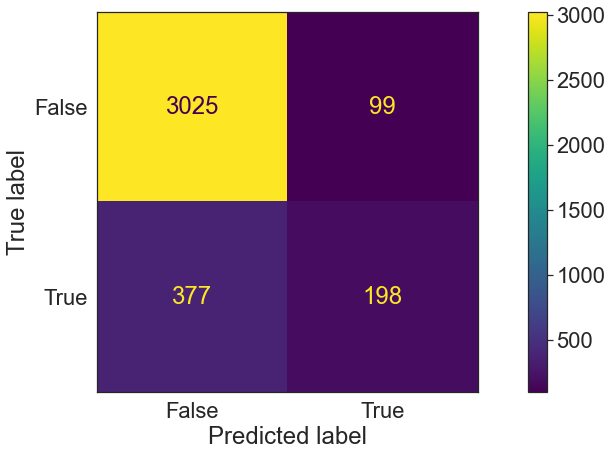

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5) 
  
knn.fit(X_train, y_train) 
knn_pred = knn.predict(X_test) 

plot_confusion_matrix(knn,X_test,y_test)

In [41]:
print("Training Accuracy: ", knn.score(X_train, y_train))
print("Testing Accuracy: ", knn.score(X_test, y_test))

Training Accuracy:  0.9003591704321632
Testing Accuracy:  0.871316572046499


### 3-Gaussian NB

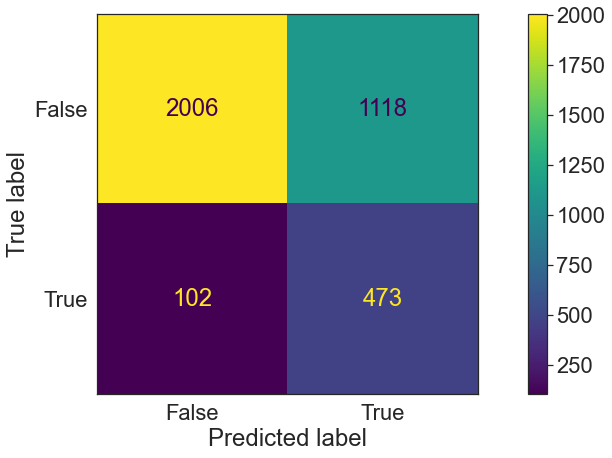

In [42]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

plot_confusion_matrix(nb,X_test,y_test)

In [43]:
print("Training Accuracy: ", nb.score(X_train, y_train))
print("Testing Accuracy: ", nb.score(X_test, y_test))

Training Accuracy:  0.6664349438072066
Testing Accuracy:  0.6701811300351447


### 4-SVM

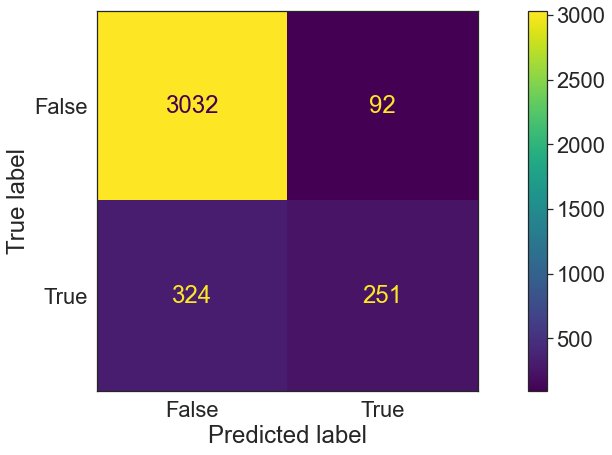

In [44]:
svm = SVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

plot_confusion_matrix(svm,X_test,y_test)

In [45]:
print("Training Accuracy: ", svm.score(X_train, y_train))
print("Testing Accuracy: ", svm.score(X_test, y_test))

Training Accuracy:  0.9058046576294752
Testing Accuracy:  0.8875371722087051


### 5-Random forest classifier


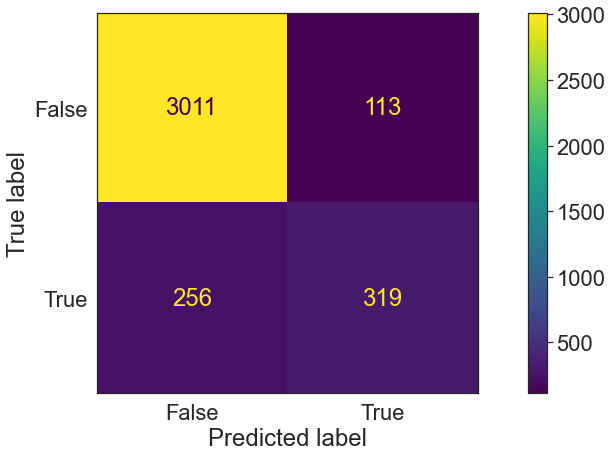

In [46]:
rfc= RandomForestClassifier(max_depth=8, max_features=6)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

plot_confusion_matrix(rfc,X_test,y_test)

In [47]:
print("Training Accuracy: ", rfc.score(X_train, y_train))
print("Testing Accuracy: ", rfc.score(X_test, y_test))

Training Accuracy:  0.9326845093268451
Testing Accuracy:  0.9002433090024331


### 6-Decision Tree classifier 

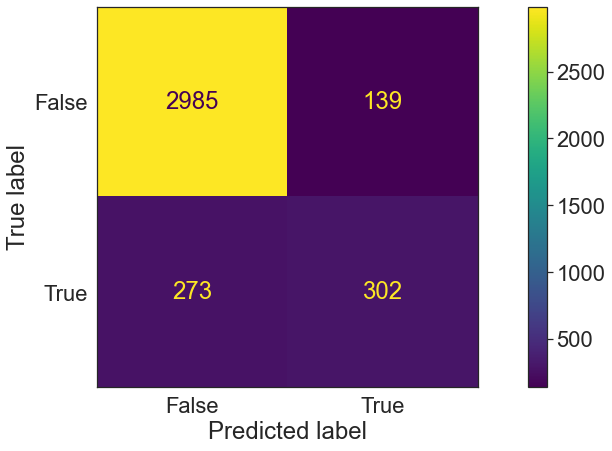

In [48]:
dt=DecisionTreeClassifier( max_depth=7, max_features=6)
dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

plot_confusion_matrix(dt,X_test,y_test)

In [49]:
print("Training Accuracy: ", dt.score(X_train, y_train))
print("Testing Accuracy: ", dt.score(X_test, y_test))

Training Accuracy:  0.9115977291159773
Testing Accuracy:  0.8886185455528521


## 2)Modeling df

In [50]:
a = df.drop('Revenue',axis=1)
b = df['Revenue']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)

In [51]:
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

### 1-Logistic Regression

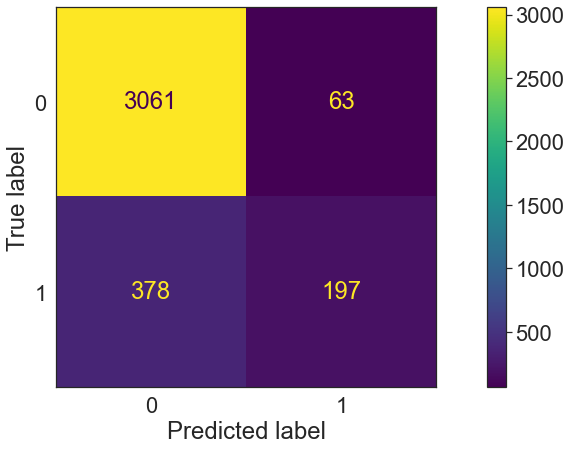

In [52]:
lr1 = LogisticRegression()
lr1.fit(a_train,b_train)

lr1_pred = lr1.predict(a_test)

plot_confusion_matrix(lr1,a_test,b_test)

In [53]:
print("Training Accuracy: ", lr1.score(a_train, b_train))
print("Testing Accuracy: ", lr1.score(a_test, b_test))

Training Accuracy:  0.8832116788321168
Testing Accuracy:  0.8807785888077859


### 2- KNN

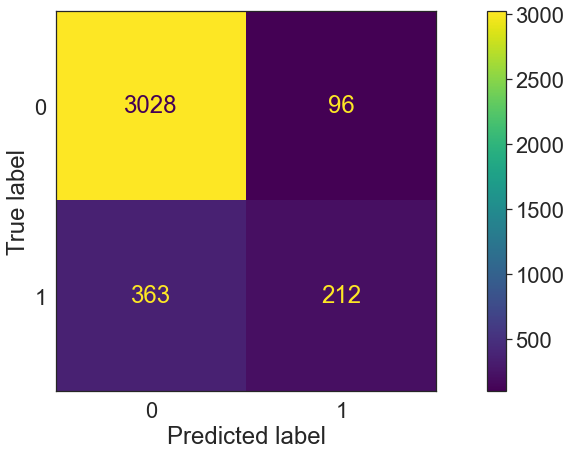

In [54]:
knn1 = KNeighborsClassifier(n_neighbors = 5) 
knn1.fit(a_train, b_train) 

knn1_pred= knn1.predict(a_test) 

plot_confusion_matrix(knn1,a_test,b_test)

In [55]:
print("Training Accuracy: ", knn1.score(a_train, b_train))
print("Testing Accuracy: ", knn1.score(a_test, b_test))

Training Accuracy:  0.9033715676051443
Testing Accuracy:  0.8759124087591241


### 3-Gaussian NB

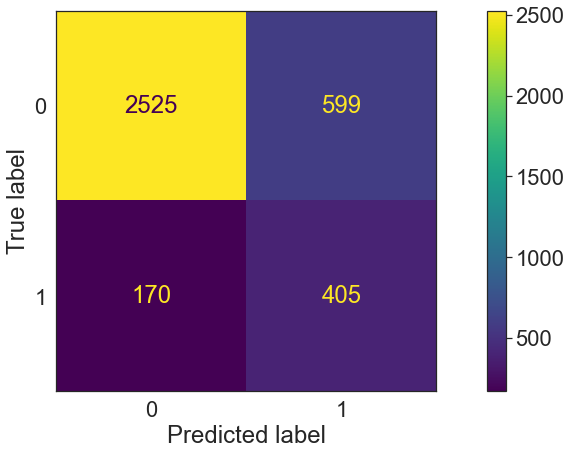

In [56]:
nb1 = GaussianNB()
nb1.fit(a_train, b_train)

nb1_pred = nb1.predict(a_test)

plot_confusion_matrix(nb1,a_test,b_test)

In [57]:
print("Training Accuracy: ", nb1.score(a_train, b_train))
print("Testing Accuracy: ", nb1.score(a_test, b_test))

Training Accuracy:  0.7885528907426718
Testing Accuracy:  0.7921059745877264


### 4- SVM

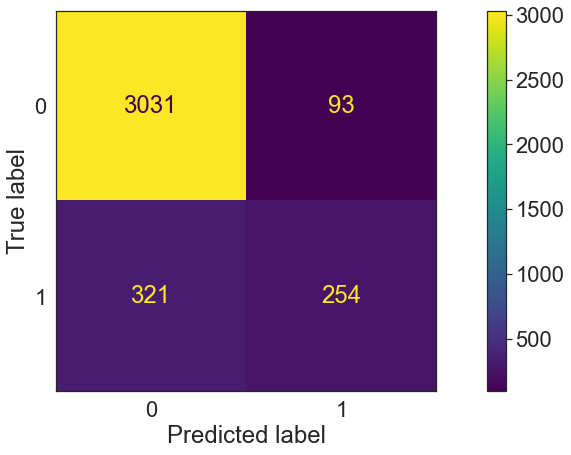

In [58]:
svm1 = SVC()
svm1.fit(a_train, b_train)

svm1_pred = svm1.predict(a_test)

plot_confusion_matrix(svm1,a_test,b_test)

In [59]:
print("Training Accuracy: ", svm1.score(a_train, b_train))
print("Testing Accuracy: ", svm1.score(a_test, b_test))

Training Accuracy:  0.905225350480825
Testing Accuracy:  0.8880778588807786


### 5-Random forest classifier

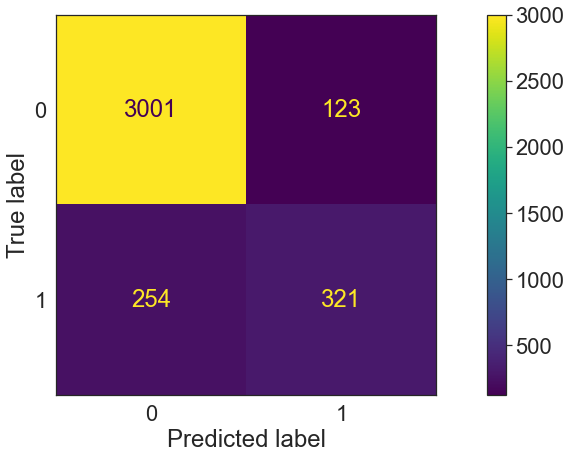

In [60]:
rfc1= RandomForestClassifier(max_depth=8, max_features=6)
rfc1.fit(a_train, b_train)

rfc1_pred = rfc1.predict(a_test)

plot_confusion_matrix(rfc1,a_test,b_test)

In [61]:
print("Training Accuracy: ", rfc1.score(a_train, b_train))
print("Testing Accuracy: ", rfc1.score(a_test, b_test))

Training Accuracy:  0.9383617193836172
Testing Accuracy:  0.8980805623141389


### 6-Decision Tree classifier 

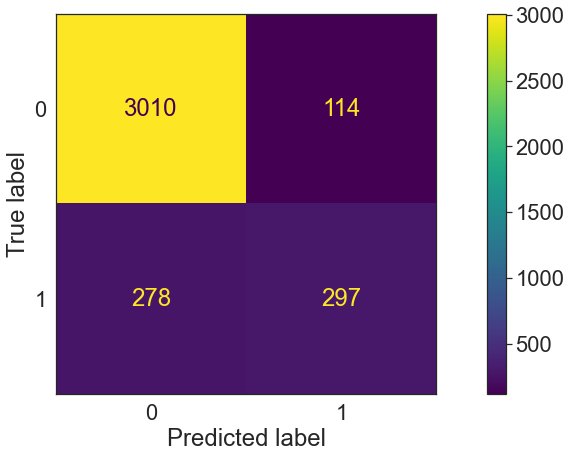

In [62]:
dt1=DecisionTreeClassifier( max_depth=7, max_features=6)
dt1.fit(a_train,b_train)

dt1_pred = dt1.predict(a_test)

plot_confusion_matrix(dt1,a_test,b_test)

In [72]:
print(classification_report(b_test,dt1_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3124
           1       0.72      0.52      0.60       575

    accuracy                           0.89      3699
   macro avg       0.82      0.74      0.77      3699
weighted avg       0.89      0.89      0.89      3699



In [63]:
print("Training Accuracy: ", dt1.score(a_train, b_train))
print("Testing Accuracy: ", dt1.score(a_test, b_test))

Training Accuracy:  0.9165797705943691
Testing Accuracy:  0.8940254122735874


## Prediction

In [64]:
new_user=[0,0,0,0,0.001418,0,0.2,0.7,0,0,0.9,0.285714,0.083333,1,0.526316,1,0]
new_user1=[3,0.022067,0,0,0.002837,0,0.05,0.5,0,0,0.5,0.428571,0.166667,1,0.105263,0,0]

In [65]:
dt1.predict([new_user])

array([0], dtype=int64)

In [66]:
dt1.predict([new_user1])

array([0], dtype=int64)

## Smote on Decision Tree Algorithm

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
a = df.drop('Revenue',axis=1)
b = df['Revenue']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=42)

In [69]:
smote=SMOTE(random_state=1,sampling_strategy='minority')
a_sm,b_sm=smote.fit_resample(a,b)

In [70]:
a_train_res, a_test_res, b_train_res, b_test_res = train_test_split(a_sm, b_sm, test_size=0.3, random_state=42)

In [71]:
dt11 = DecisionTreeClassifier( max_depth=7, max_features=6)
dt11.fit(a_train_res, b_train_res.ravel())
predictions = dt11.predict(a_test_res)
 
# print classification report
print(classification_report(b_test_res, predictions))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3123
           1       0.90      0.91      0.90      3131

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254



In [78]:
print("Training Accuracy: ", dt11.score(a_train_res, b_train_res))
print("Testing Accuracy: ", dt11.score(a_test_res, b_test_res))

Training Accuracy:  0.9148732008224811
Testing Accuracy:  0.9016629357211384
